# Introduction To Data Science – Assignment 2

---

#### Sections A – B – C – D

---

##***Instructions: Read These Carefully Before Starting!***

1. Due Date: Thursday 20th October 2022 – 11:59PM

2. **Name the file in the format Lyyxxxx_A2.ipynb and save it as .ipynb (e.g. L216666_A2.ipynb)**

3. Submission will be taken on Google Classroom (**submit SINGLE .ipynb file ONLY**)

4. **Assignment will not be evaluated if**:

> * You submit python (.py) files
> * You submit multiple .ipynb files
> * You submit compressed (.rar or .zip) files

5. **Work in the spaces provided and do not delete/modify any cells from this template.**

6. Upload data files directly to Google Colab - do not use Google Drive or GitHub linking method

*Not following these instructions will lead to mark deduction.*

---

All source files needed to complete this assignment can be found on the following [Google Drive link](https://drive.google.com/drive/folders/1qBib_6ZOhvHb73ZRLWiCMWl9NFyU1IDO?usp=sharing). Download these files and upload them to your Google Colab Notebook. 

**Do not link Google Drive or GitHub with Colab.**

**Do not add these files with your submission on Google Classroom.**

---

Happy Coding 🌺

---

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

---

---
## Question 0

Add all library imports here

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

---
## Question 1

####Single Linear Regression with Gradient Descent

> Take help from slides 26 and 30
---

**Part A -**
Write a function that calculates and returns value for hypothesis $h_\theta(x)$

In [ ]:
# complete this function implementation
def hypothesis(x, theta):
    hyp = (theta[1] * x + theta[0])
    return hyp

**Part B -**
Write a function that calculates and returns value for loss/cost $J(\theta_0, \theta_1)$

In [ ]:
# complete this function implementation
def loss(hypothesis_x, y):
    m = len(hypothesis_x)
    return  sum([(hypothesis_x[i] - y[i])**2 for i in range(m)]) * (2 / m)

**Part C-**
Write a function that applies the gradient descent algorithm and updates values of $\theta_0$ and $\theta_1$ until they converge.

* take default vaue of $α$ to be 0.015
* take default number of iterations to be 15000
* print loss after every 500 iterations

In [ ]:
# complete this function implementation
def gradientdescent(x, y, theta, num_iterations=15000, alpha=0.015):
    m = x.size
    for j in range(num_iterations):
        h = []
        for num in x:
            h.append(hypothesis(num, theta))
        derivative_0 = sum([(hypothesis(x[i], theta) - y[i]) for i in range(m)])
        derivative_1 = sum([(hypothesis(x[i], theta) - y[i])*x[i] for i in range(m)])
        theta[0] = theta[0] - alpha * (1 / m) * derivative_0
        theta[1] = theta[1] - alpha * (1 / m) * derivative_1
        # report
        if j % 500 == 0:

            print('loss:', loss(h, y))

**Part D -**
FactoryRevenue.csv contains information about the number of workers in a factory and the annual profit for that factory. Import the file FactoryRevenue.csv as a Pandas DataSet and print out the information for it.

In [ ]:
data = pd.read_csv("Update_FactoryRevenue.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  98 non-null     float64
 1   AnnualProfit         98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


**Part E -**
Remove rows that have any null values

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  97 non-null     float64
 1   AnnualProfit         97 non-null     float64
dtypes: float64(2)
memory usage: 2.3 KB


**Part F -**

First identify the independant and dependant variables. 

Then create two arrays named x and y and add independant variable data to array x, dependant variable data to array y.

In [ ]:
# independant variable:
# dependant variable:
x = np.array(data.iloc[:,0].values)
y = np.array(data.iloc[:,1].values)

**Part G -** 

Create an array called 'theta' that will hold $θ_0$ and $θ_1$. Initalize both values to 0.

Then call the gradientDescent function using array x, array y, and array theta. Do not provide any other input parameters.

Print out the values of y-intercept and slope/gradient

In [ ]:
theta = [0, 0]
gradientdescent(x, y, theta)
print("Y-intercept: ", theta[0])
print("Slope: ", theta[1])

loss: 128.29093550982265
loss: 18.291768564326606
loss: 17.93349036245195
loss: 17.909593338522804
loss: 17.907999415840145
loss: 17.90789310178507
loss: 17.907886010676783
loss: 17.907885537702484
loss: 17.90788550615528
loss: 17.90788550405109
loss: 17.90788550391075
loss: 17.907885503901383
loss: 17.90788550390075
loss: 17.907885503900708
loss: 17.907885503900705
loss: 17.907885503900722
loss: 17.907885503900722
loss: 17.90788550390071
loss: 17.907885503900722
loss: 17.90788550390072
loss: 17.90788550390071
loss: 17.90788550390072
loss: 17.90788550390071
loss: 17.907885503900708
loss: 17.90788550390072
loss: 17.90788550390072
loss: 17.90788550390072
loss: 17.90788550390072
loss: 17.90788550390072
loss: 17.90788550390072
Y-intercept:  -3.895780878311771
Slope:  1.1930336441895852


**Part H -** Plot a scatter plot and regression line on the same graph

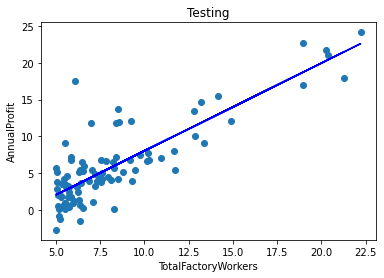

In [ ]:
plt.scatter(data["TotalFactoryWorkers"], data["AnnualProfit"])
plt.plot(x, theta[1]*x+theta[0], color='blue')
plt.title("Testing")
plt.xlabel("TotalFactoryWorkers")
plt.ylabel("AnnualProfit")
plt.show()


---
## Question 2

Logistic Regression on Flowers Dataset

---



**Part A** - Load the file FlowersData.csv and describe the dataset

In [ ]:
data=pd.read_csv("FlowersData.csv")
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Part B** - Split data into training and test data using SKLearn train_test_split. Specify parameter test_size to be 25%

Hint: You will be needing 4 arrays: X_train, X_test, y_train, y_test

In [ ]:
X = data.iloc[:, [0,1,2,]].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=16)

**Part C** - Perform scaling on the X_test and X_train values using StandardScacler from SKLearn Library

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Part D** - Train Model using SKLearn LogisticRegression

In [ ]:
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)



LogisticRegression(random_state=16)

**Part E** - Predict Labels for test split

In [ ]:
predictions = logisticRegr.predict(X_test)
print("prediction: ",predictions)


prediction:  ['daffodil' 'hibiscus' 'daffodil' 'lily' 'daffodil' 'hibiscus' 'daffodil'
 'hibiscus' 'hibiscus' 'daffodil' 'daffodil' 'lily' 'daffodil' 'hibiscus'
 'lily' 'daffodil' 'hibiscus' 'hibiscus' 'daffodil' 'daffodil' 'hibiscus'
 'hibiscus' 'daffodil' 'lily' 'daffodil' 'daffodil' 'daffodil' 'lily'
 'lily' 'hibiscus' 'lily' 'lily' 'hibiscus' 'daffodil' 'hibiscus'
 'daffodil' 'hibiscus' 'daffodil']


---
## Question 3

Confusion Matrix Construction

---

**Part A** - Using the prediction result of logistic regression (Question 2) construct a confusion matrix using SKLearn confusion_matrix

Print out this confusion matrix

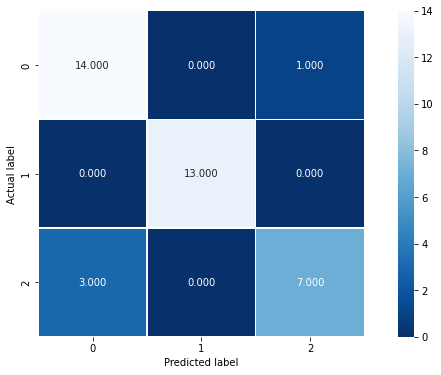

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


**Part B** - Calculate and print Accuracy

In [ ]:

print('\nAccuracy: ',(accuracy_score(y_test, predictions)))


Accuracy:  0.8947368421052632


**Part C** - Calculate and print Recall

In [ ]:
print('\nRecall: ',(recall_score(y_test, predictions,average='weighted')))


Recall:  0.8947368421052632


**Part D** - Calculate and print Precision

In [ ]:
print('Precision: ',(precision_score(y_test, predictions, average='weighted')))

Precision:  0.8974458204334365


**Part E** - Calculate and print $𝐹_1$ Score

In [ ]:
print('F1-score: ',(f1_score(y_test, predictions, average='weighted')))


F1-score:  0.8921783625730995
